In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Kings XI Punjab') & (df2['team2'] == 'Sunrisers Hyderabad')]
match2 = df2[(df2['team1'] == 'Sunrisers Hyderabad') & (df2['team2'] == 'Kings XI Punjab')]

Match1 = Punjab Home Ground

Match2 = Hyderabad Home Ground

# Overall Punjab vs Hyderabad:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season        city        date            team1  \
404   405    2013   Hyderabad  2013-04-19  Kings XI Punjab   
465   466    2014     Sharjah  2014-04-22  Kings XI Punjab   
593   594    2016   Hyderabad  2016-04-23  Kings XI Punjab   
621   622    2016  Chandigarh  2016-05-15  Kings XI Punjab   
651  7909    2018      Mohali    19/04/18  Kings XI Punjab   

                   team2          toss_winner toss_decision  result  \
404  Sunrisers Hyderabad      Kings XI Punjab           bat  normal   
465  Sunrisers Hyderabad  Sunrisers Hyderabad         field  normal   
593  Sunrisers Hyderabad  Sunrisers Hyderabad         field  normal   
621  Sunrisers Hyderabad      Kings XI Punjab           bat  normal   
651  Sunrisers Hyderabad      Kings XI Punjab           bat  normal   

     dl_applied               winner  win_by_runs  win_by_wickets  \
404           0  Sunrisers Hyderabad            0               5   
465           0      Kings XI Punjab           72               0   
593           0  Sunrisers Hyderabad            0               5   
621           0  Sunrisers Hyderabad            0               7   
651           0      Kings XI Punjab           15               0   

       player_of_match                                              venue  \
404          GH Vihari          Rajiv Gandhi International Stadium, Uppal   
465         GJ Maxwell                            Sharjah Cricket Stadium   
593  Mustafizur Rahman          Rajiv Gandhi International Stadium, Uppal   
621            HM Amla  Punjab Cricket Association IS Bindra Stadium, ...   
651           CH Gayle  Punjab Cricket Association IS Bindra Stadium, ...   

                   umpire1         umpire2          umpire3  
404        HDPK Dharmasena       CK Nandan              NaN  
465              M Erasmus          S Ravi              NaN  
593           AK Chaudhary       CK Nandan              NaN  
621  KN Ananthapadmanabhan       M Erasmus              NaN  
651            Nigel Llong  Anil Chaudhary  Vineet Kulkarni

Matches played between Punjab and Hyderabad.

In [6]:
match.shape

(14, 18)

In [7]:
match['winner'].value_counts()

Sunrisers Hyderabad    10
Kings XI Punjab         4
Name: winner, dtype: int64

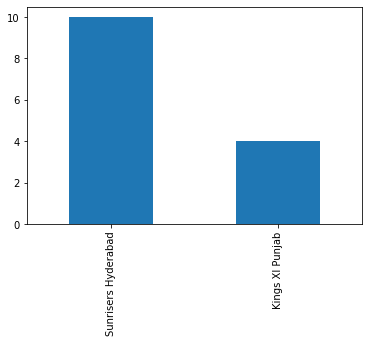

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

Punjab won 4 times and Hyderabad won 10 times against each other.

In [9]:
match['toss_winner'].value_counts()

Kings XI Punjab        11
Sunrisers Hyderabad     3
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

field    10
bat       4
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Kings XI Punjab        3
Sunrisers Hyderabad    2
Name: winner, dtype: int64

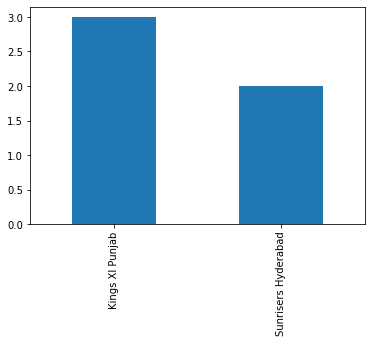

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Punjab won the toss and won the match 3 times whereas Hyderabad 2 times. So winning toss doesn't have much affect to winning the match.

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning         batting_team     bowling_team  over  ball  \
4312        19       1  Sunrisers Hyderabad  Kings XI Punjab     1     1   
4313        19       1  Sunrisers Hyderabad  Kings XI Punjab     1     2   
4314        19       1  Sunrisers Hyderabad  Kings XI Punjab     1     3   
4315        19       1  Sunrisers Hyderabad  Kings XI Punjab     1     4   
4316        19       1  Sunrisers Hyderabad  Kings XI Punjab     1     5   

        batsman non_striker          bowler  is_super_over  ...  bye_runs  \
4312  DA Warner    S Dhawan  Sandeep Sharma              0  ...         0   
4313  DA Warner    S Dhawan  Sandeep Sharma              0  ...         0   
4314  DA Warner    S Dhawan  Sandeep Sharma              0  ...         0   
4315  DA Warner    S Dhawan  Sandeep Sharma              0  ...         0   
4316   S Dhawan   DA Warner  Sandeep Sharma              0  ...         0   

      legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
4312            0            0             0             0           0   
4313            0            0             0             0           0   
4314            0            0             0             0           0   
4315            0            0             0             1           0   
4316            0            0             0             1           0   

      total_runs  player_dismissed dismissal_kind fielder  
4312           0               NaN            NaN     NaN  
4313           0               NaN            NaN     NaN  
4314           0               NaN            NaN     NaN  
4315           1               NaN            NaN     NaN  
4316           1               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Punjab and Hyderabad.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Status of David Warner's batting during SRH's inning (Out / Not Out, Strike Rate):

In [15]:
strike_rate_list = []
ids1 = list(delivery[delivery['batsman'] == 'DA Warner']['match_id'].unique())
for j in ids1:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'DA Warner')]['batsman_runs'])
    total_runs = np.sum(runs)
    total_balls = len(runs)
    if total_balls > 0:
        strike_rate = np.round((total_runs/total_balls)*100,2)
    else:
        strike_rate = 0
    strike_rate_list.append(strike_rate)
print(strike_rate_list)
print(len(delivery[delivery['player_dismissed'] == 'DA Warner']))

[122.81, 188.89, 66.67, 183.33, 141.46, 150.0, 184.38, 123.81, 117.46, 149.18]
8


David Warner played 10 matches for Hyderabad against Punjab and scored runs with these strike rates and he got out 8 times.

In [16]:
avg_strike_rate = np.round(np.mean(strike_rate_list),2)
avg_strike_rate

142.8

Average strike rate of David Warner is 142.8 against Punjab.

In [17]:
strike_rate_list_batting_first = []
ids2 = list(delivery[(delivery['batsman'] == 'DA Warner') & (delivery['inning'] == 1)]['match_id'].unique())
for j in ids2:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'DA Warner') & (delivery['inning'] == 1)]['batsman_runs'])
    total_runs = np.sum(runs)
    total_balls = len(runs)
    if total_balls > 0:
        strike_rate = np.round((total_runs/total_balls)*100,2)
    else:
        strike_rate = 0
    strike_rate_list_batting_first.append(strike_rate)
print(strike_rate_list_batting_first)
print(len(delivery[(delivery['player_dismissed'] == 'DA Warner') & (delivery['inning'] == 1)]))

[122.81, 188.89, 183.33, 141.46, 150.0, 117.46, 149.18]
5


David Warner played 7 matches for Hyderabad against Punjab while batting first and scored runs with these strike rates and he got out 5 times.

In [18]:
avg_strike_rate_batting_first = np.round(np.mean(strike_rate_list_batting_first),2)
avg_strike_rate_batting_first

150.45

Average strike rate of David Warner is 150.45 against Punjab while batting first.

In [19]:
strike_rate_list_batting_second = []
ids3 = list(delivery[(delivery['batsman'] == 'DA Warner') & (delivery['inning'] == 2)]['match_id'].unique())
for j in ids3:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'DA Warner') & (delivery['inning'] == 2)]['batsman_runs'])
    total_runs = np.sum(runs)
    total_balls = len(runs)
    if total_balls > 0:
        strike_rate = np.round((total_runs/total_balls)*100,2)
    else:
        strike_rate = 0
    strike_rate_list_batting_second.append(strike_rate)
print(strike_rate_list_batting_second)
print(len(delivery[(delivery['player_dismissed'] == 'DA Warner') & (delivery['inning'] == 2)]))

[66.67, 184.38, 123.81]
3


David Warner played 3 matches for Hyderabad against Punjab while batting second and scored runs with these strike rates and he got out all the times.

In [20]:
avg_strike_rate_batting_second = np.round(np.mean(strike_rate_list_batting_second),2)
avg_strike_rate_batting_second

124.95

Average strike rate of David Warner is 124.95 against Punjab while batting second.

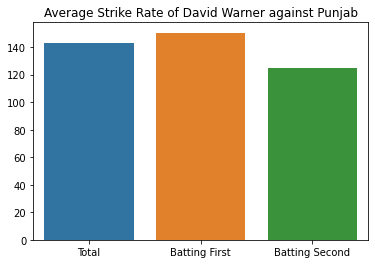

In [21]:
average_strike_rate = pd.Series([avg_strike_rate,avg_strike_rate_batting_first,avg_strike_rate_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_strike_rate.index , y = average_strike_rate)
plt.title('Average Strike Rate of David Warner against Punjab')
plt.show()

So David Warner's Strike Rate is higher when he batted in first inning.

In [22]:
strike_rate_list_overall = []
ids4 = list(df1[(df1['batsman'] == 'DA Warner') & (df1['batting_team'] == 'Sunrisers Hyderabad')]['match_id'].unique())
for j in ids4:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'DA Warner') & (df1['batting_team'] == 'Sunrisers Hyderabad')]['batsman_runs'])
    total_runs = np.sum(runs)
    total_balls = len(runs)
    if total_balls > 0:
        strike_rate = np.round((total_runs/total_balls)*100,2)
    else:
        strike_rate = 0
    strike_rate_list_overall.append(strike_rate)
print(strike_rate_list_overall)
print('\nTotal matches played -',len(strike_rate_list_overall))
print('\nHe got out',len(df1[(df1['player_dismissed'] == 'DA Warner') & (df1['batting_team'] == 'Sunrisers Hyderabad')]),'times.')

[155.56, 161.7, 144.12, 83.87, 122.81, 57.14, 102.38, 188.89, 210.0, 142.86, 117.65, 100.0, 132.69, 105.71, 91.43, 66.67, 128.89, 0.0, 122.64, 119.61, 85.71, 109.09, 171.88, 183.33, 188.89, 125.53, 195.65, 133.33, 123.26, 203.57, 140.0, 133.33, 165.45, 128.57, 141.46, 217.86, 100.0, 126.32, 106.25, 150.0, 162.5, 120.0, 223.08, 92.86, 147.54, 148.0, 184.38, 0.0, 176.92, 133.33, 137.14, 73.33, 148.39, 123.81, 130.36, 112.5, 96.55, 157.63, 176.92, 160.0, 186.84, 183.64, 77.78, 121.43, 117.46, 108.51, 196.15, 179.49, 125.53, 121.21, 149.18]

Total matches played - 71

He got out 59 times.


David Warner played 71 matches in overall IPL and scored runs with these strike rates and he got out 59 times.

In [23]:
avg_strike_rate_overall = np.round(np.mean(strike_rate_list_overall),2)
avg_strike_rate_overall

134.6

Average strike rate of David Warner is 134.6 in overall IPL.

In [24]:
strike_rate_list_overall_batting_first = []
ids5 = list(df1[(df1['batsman'] == 'DA Warner') & (df1['inning'] == 1) & (df1['batting_team'] == 'Sunrisers Hyderabad')]['match_id'].unique())
for j in ids5:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'DA Warner') & (df1['inning'] == 1) & (df1['batting_team'] == 'Sunrisers Hyderabad')]['batsman_runs'])
    total_runs = np.sum(runs)
    total_balls = len(runs)
    if total_balls > 0:
        strike_rate = np.round((total_runs/total_balls)*100,2)
    else:
        strike_rate = 0
    strike_rate_list_overall_batting_first.append(strike_rate)
print(strike_rate_list_overall_batting_first)
print('\nTotal matches played -',len(strike_rate_list_overall_batting_first))
print('\nHe got out',len(df1[(df1['player_dismissed'] == 'DA Warner') & (df1['inning'] == 1) & (df1['batting_team'] == 'Sunrisers Hyderabad')]),'times.')

[155.56, 144.12, 122.81, 57.14, 102.38, 188.89, 210.0, 142.86, 105.71, 91.43, 128.89, 0.0, 122.64, 119.61, 85.71, 171.88, 183.33, 188.89, 133.33, 140.0, 165.45, 141.46, 217.86, 126.32, 106.25, 150.0, 162.5, 120.0, 92.86, 0.0, 176.92, 137.14, 73.33, 148.39, 130.36, 96.55, 176.92, 160.0, 183.64, 117.46, 125.53, 121.21, 149.18]

Total matches played - 43

He got out 37 times.


David Warner played 43 matches in overall IPL while batting first and scored runs with these strike rates and he got out 37 times.

In [25]:
avg_strike_rate__overall_batting_first = np.round(np.mean(strike_rate_list_overall_batting_first),2)
avg_strike_rate__overall_batting_first

131.97

Average strike rate of David Warner is 131.97 in overall IPL while batting first.

In [26]:
strike_rate_list_overall_batting_second = []
ids6 = list(df1[(df1['batsman'] == 'DA Warner') & (df1['inning'] == 2) & (df1['batting_team'] == 'Sunrisers Hyderabad')]['match_id'].unique())
for j in ids6:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'DA Warner') & (df1['inning'] == 2) & (df1['batting_team'] == 'Sunrisers Hyderabad')]['batsman_runs'])
    total_runs = np.sum(runs)
    total_balls = len(runs)
    if total_balls > 0:
        strike_rate = np.round((total_runs/total_balls)*100,2)
    else:
        strike_rate = 0
    strike_rate_list_overall_batting_second.append(strike_rate)
print(strike_rate_list_overall_batting_second)
print('\nTotal matches played -',len(strike_rate_list_overall_batting_second))
print('\nHe got out',len(df1[(df1['player_dismissed'] == 'DA Warner') & (df1['inning'] == 2) & (df1['batting_team'] == 'Sunrisers Hyderabad')]),'times.')

[161.7, 83.87, 117.65, 100.0, 132.69, 66.67, 109.09, 125.53, 195.65, 123.26, 203.57, 133.33, 128.57, 100.0, 223.08, 147.54, 148.0, 184.38, 133.33, 123.81, 112.5, 157.63, 186.84, 77.78, 121.43, 108.51, 196.15, 179.49]

Total matches played - 28

He got out 22 times.


David Warner played 28 matches in overall IPL while batting second and scored runs with these strike rates and he got out 22 times.

In [27]:
avg_strike_rate__overall_batting_second = np.round(np.mean(strike_rate_list_overall_batting_second),2)
avg_strike_rate__overall_batting_second

138.64

Average strike rate of David Warner is 138.64 in overall IPL while batting second.

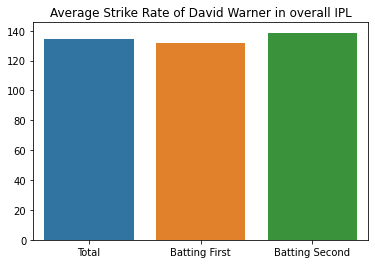

In [28]:
average_strike_rate_overall = pd.Series([avg_strike_rate_overall,avg_strike_rate__overall_batting_first,avg_strike_rate__overall_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_strike_rate_overall.index , y = average_strike_rate_overall)
plt.title('Average Strike Rate of David Warner in overall IPL')
plt.show()

So David Warner's Strike Rate is higher when he batted in second inning in overall IPL.

## KL Rahul's contribution to KXIP's total score:

In [29]:
contribution_list = []
ids_Rahul = list(delivery[(delivery['batsman'] == 'KL Rahul') & (delivery['batting_team'] == 'Kings XI Punjab')]['match_id'].unique())
for j in ids_Rahul:
    batsman_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'KL Rahul') & (delivery['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    total_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Kings XI Punjab')]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    contribution = np.round((batsman/total)*100,2)
    if contribution > 0:
        contribution_list.append(contribution)
print(contribution_list)

[8.96, 26.45, 46.71, 48.28]


So this is the distribution of Kl Rahul (in percentage) to his team Punjab against Hyderabad.

In [30]:
avg_contribution = np.round(np.mean(contribution_list),2)
avg_contribution

32.6

Kl Rahul scored 32.6% runs in average per match of total score of his team against Hyderabad.

In [31]:
contribution_list_batting_first = []
ids_Rahul_batting_first = list(delivery[(delivery['batsman'] == 'KL Rahul') & (delivery['inning'] == 1) & (delivery['batting_team'] == 'Kings XI Punjab')]['match_id'].unique())
for j in ids_Rahul_batting_first:
    batsman_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'KL Rahul') & (delivery['inning'] == 1) & (delivery['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    total_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Kings XI Punjab') & (delivery['inning'] == 1)]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    contribution = np.round((batsman/total)*100,2)
    if contribution > 0:
        contribution_list_batting_first.append(contribution)
print(contribution_list_batting_first)

[8.96]


KL Rahul batted in first inning once and contributed 8.96% runs.

In [32]:
contribution_list_batting_second = []
ids_Rahul_batting_second = list(delivery[(delivery['batsman'] == 'KL Rahul') & (delivery['inning'] == 2) & (delivery['batting_team'] == 'Kings XI Punjab')]['match_id'].unique())
for j in ids_Rahul_batting_second:
    batsman_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'KL Rahul') & (delivery['inning'] == 2) & (delivery['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    total_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Kings XI Punjab') & (delivery['inning'] == 2)]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    contribution = np.round((batsman/total)*100,2)
    if contribution > 0:
        contribution_list_batting_second.append(contribution)
print(contribution_list_batting_second)

[26.45, 46.71, 48.28]


So this is the distribution of Kl Rahul (in percentage) to his team Punjab against Hyderabad while batting second.

In [33]:
avg_contribution_batting_second = np.round(np.mean(contribution_list_batting_second),2)
avg_contribution_batting_second

40.48

Kl Rahul scored 40.48% runs in average per match of total score of his team against Hyderabad.

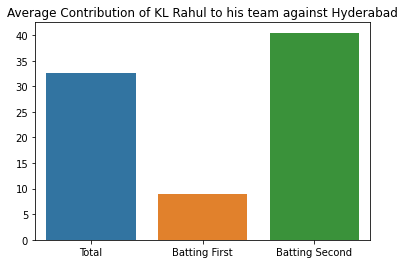

In [34]:
average_contribution = pd.Series([avg_contribution,contribution_list_batting_first[0],avg_contribution_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_contribution.index , y = average_contribution)
plt.title('Average Contribution of KL Rahul to his team against Hyderabad')
plt.show()

So Kl Rahul contributed more in the second inning for his team against Hyderabad.

In [35]:
contribution_list_overall = []
total_ids1 = list(df1[(df1['batsman'] == 'KL Rahul') & (df1['batting_team'] == 'Kings XI Punjab')]['match_id'].unique())
for j in total_ids1:
    batsman_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'KL Rahul') & (df1['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    total_runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Kings XI Punjab')]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    contribution = np.round((batsman/total)*100,2)
    if contribution > 0:
        contribution_list_overall.append(contribution)
print(contribution_list_overall)

[30.36, 29.81, 18.69, 8.96, 47.66, 14.65, 26.45, 13.04, 54.43, 67.79, 30.77, 23.66, 51.56, 4.88, 2.0, 0.51, 38.92, 8.57, 38.73, 46.71, 50.98, 10.0, 27.89, 7.14, 23.16, 48.28, 1.08, 39.89]


So this is the distribution of Kl Rahul (in percentage) to his team Punjab in overall IPL.

In [36]:
avg_contribution_overall = np.round(np.mean(contribution_list_overall),2)
avg_contribution_overall

27.38

Kl Rahul scored 27.38% runs in average per match of total score of his team in overall IPL.

In [37]:
contribution_list_overall_batting_first = []
total_ids1 = list(df1[(df1['batsman'] == 'KL Rahul') & (df1['batting_team'] == 'Kings XI Punjab')]['match_id'].unique())
for j in total_ids1:
    batsman_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'KL Rahul') & (df1['inning'] == 1) & (df1['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    total_runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 1)]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    if total > 0:
        contribution = np.round((batsman/total)*100,2)
    if contribution > 0 and contribution not in contribution_list_overall_batting_first:
        contribution_list_overall_batting_first.append(contribution)
print(contribution_list_overall_batting_first)

[39.89, 29.81, 18.69, 8.96, 14.65, 13.04, 23.66, 4.88, 2.0, 8.57, 50.98, 10.0, 27.89, 7.14, 1.08]


So this is the distribution of Kl Rahul (in percentage) to his team Punjab in overall IPL while batting first.

In [38]:
avg_contribution_overall_batting_first = np.round(np.mean(contribution_list_overall_batting_first),2)
avg_contribution_overall_batting_first

17.42

Kl Rahul scored 17.42% runs in average per match of total score of his team in overall IPL while batting first.

In [39]:
contribution_list_overall_batting_second = []
total_ids1 = list(df1[(df1['batsman'] == 'KL Rahul') & (df1['batting_team'] == 'Kings XI Punjab')]['match_id'].unique())
for j in total_ids1:
    batsman_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'KL Rahul') & (df1['inning'] == 2) & (df1['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    total_runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 2)]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    if total > 0:
        contribution = np.round((batsman/total)*100,2)
    if contribution > 0 and contribution not in contribution_list_overall_batting_second:
        contribution_list_overall_batting_second.append(contribution)
print(contribution_list_overall_batting_second)

[30.36, 47.66, 26.45, 54.43, 67.79, 30.77, 51.56, 0.51, 38.92, 38.73, 46.71, 23.16, 48.28, 39.89]


So this is the distribution of Kl Rahul (in percentage) to his team Punjab in overall IPL while batting second.

In [40]:
avg_contribution_overall_batting_second = np.round(np.mean(contribution_list_overall_batting_second),2)
avg_contribution_overall_batting_second

38.94

Kl Rahul scored 38.94% runs in average per match of total score of his team in overall IPL while batting second.

In [41]:
average_contribution_overall = pd.Series([avg_contribution_overall,avg_contribution_overall_batting_first,avg_contribution_overall_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_contribution_overall.index , y = average_contribution_overall)
plt.title('Average Contribution of KL Rahul to his team in overall IPL')
plt.show()

So KL Rahul contributed more in the second inning for his team in overall IPL.

## How many balls will SRH take to score 50 runs:

In [69]:
ball_taken = []
for j in ids:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad')]['total_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad')]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad')]['noball_runs'])
    s = 0
    l = []
    wide = 0
    noball = 0
    total_balls = 0
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if wide_runs[i] > 0:
            wide += 1
        elif noball_runs[i] > 0:
            noball += 1
        if s >= 50:
            break
    if s >= 50:
        total_balls = len(l) - wide - noball
    if total_balls > 0:
        ball_taken.append(total_balls)
print(ball_taken)

[51, 43, 27, 35, 40, 54, 29, 44, 32, 31, 26, 45, 52, 19]


Hyderabad took these number of balls to score 50 runs.

In [70]:
avg_balls_taken = math.ceil(np.mean(ball_taken))
avg_balls_taken

38

Hyderabad took 38 balls in an average against Punjab to score 50.

In [72]:
ball_taken_batting_first = []
total_ids1 = list(delivery[(delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning']==1)]['match_id'].unique())
for j in total_ids1:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning']==1)]['total_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning']==1)]['wide_runs'])
    noball_runs= list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning']==1)]['noball_runs'])
    s = 0
    l = []
    wide = 0
    noball = 0
    total_balls = 0
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if wide_runs[i] > 0:
            wide += 1
        elif noball_runs[i] > 0:
            noball += 1
        if s >= 50:
            break
    if s >= 50:
        total_balls = len(l) - wide - noball
    if total_balls > 0:
        ball_taken_batting_first.append(total_balls)
print(ball_taken_batting_first)

[54, 29, 44, 32, 31, 26, 45, 52, 19]


Hyderabad took these number of balls to score 50 runs while batting first.

In [73]:
avg_balls_taken_batting_first = math.ceil(np.mean(ball_taken_batting_first))
avg_balls_taken_batting_first

37

Hyderabad took 37 balls in an average against Punjab to score 50 while batting first.

In [74]:
ball_taken_batting_second = []
total_ids1 = list(delivery[(delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning']==2)]['match_id'].unique())
for j in total_ids1:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning']==2)]['total_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning']==2)]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning']==2)]['noball_runs'])
    s = 0
    l = []
    wide = 0
    noball = 0
    total_balls = 0
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if wide_runs[i] > 0:
            wide += 1
        elif noball_runs[i] > 0:
            noball += 1
        if s >= 50:
            break
    if s >= 50:
        total_balls = len(l) - wide - noball
    if total_balls > 0:
        ball_taken_batting_second.append(total_balls)
print(ball_taken_batting_second)

[51, 43, 27, 35, 40]


Hyderabad took these number of balls to score 50 runs while batting second.

In [75]:
avg_balls_taken_batting_second = math.ceil(np.mean(ball_taken_batting_second))
avg_balls_taken_batting_second

40

Hyderabad took 40 balls in an average against Punjab to score 50 while batting second.

In [76]:
average_balls = pd.Series([avg_balls_taken,avg_balls_taken_batting_first,avg_balls_taken_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_balls.index , y = average_balls)
plt.title('Average balls taken by Hyderabad to score 50 against Punjab')
plt.show()

Hyderabad took 37-40 balls in an average to score 50 runs against Punjab.

In [49]:
ball_taken_overall = []
total_ids1 = list(df1[df1['batting_team'] == 'Sunrisers Hyderabad']['match_id'].unique())
ball_list = []
for j in total_ids1:
    runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Sunrisers Hyderabad')]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Sunrisers Hyderabad')]['wide_runs'])
    noball_runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Sunrisers Hyderabad')]['noball_runs'])
    s = 0
    l = []
    wide = 0
    noball = 0
    total_balls = 0
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if wide_runs[i] > 0:
            wide += 1
        elif noball_runs[i] > 0:
            noball += 1
        if s >= 50:
            break
    if s >= 50:
        total_balls = len(l) - wide - noball
    if total_balls > 0:
        ball_taken_overall.append(total_balls)
print(ball_taken_overall)

[34, 33, 47, 54, 61, 42, 44, 31, 23, 31, 43, 39, 42, 56, 52, 67, 61, 51, 68, 51, 54, 57, 46, 52, 46, 43, 49, 38, 70, 46, 65, 51, 50, 35, 51, 45, 42, 38, 43, 42, 45, 37, 33, 47, 37, 26, 60, 44, 45, 35, 31, 25, 41, 44, 45, 26, 33, 61, 34, 65, 50, 34, 27, 80, 40, 52, 36, 57, 43, 36, 42, 41, 47, 43, 35, 33, 35, 45, 41, 47, 36, 48, 44, 34, 51, 34, 51, 33, 30, 39, 39, 41, 34, 29, 29, 32, 50, 60, 45, 27, 27, 34, 35, 24, 28, 30, 34]


Hyderabad took these number of balls to score 50 runs in overall IPL.

In [50]:
avg_balls_taken_overall = math.ceil(np.mean(ball_taken_overall))
avg_balls_taken_overall

43

Hyderabad took 43 balls in an average in overall IPL to score 50.

In [51]:
ball_taken_overall_batting_first = []
total_ids1 = list(df1[(df1['batting_team'] == 'Sunrisers Hyderabad') & (df1['inning'] == 1)]['match_id'].unique())
for j in total_ids1:
    runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Sunrisers Hyderabad') & (df1['inning'] == 1)]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Sunrisers Hyderabad') & (df1['inning'] == 1)]['wide_runs'])
    noball_runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Sunrisers Hyderabad') & (df1['inning'] == 1)]['noball_runs'])
    s = 0
    l = []
    wide = 0
    noball = 0
    total_balls = 0
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if wide_runs[i] > 0:
            wide += 1
        elif noball_runs[i] > 0:
            noball += 1
        if s >= 50:
            break
    if s >= 50:
        total_balls = len(l) - wide - noball
    if total_balls > 0:
        ball_taken_overall_batting_first.append(total_balls)
print(ball_taken_overall_batting_first)

[34, 47, 61, 42, 44, 31, 23, 31, 56, 52, 68, 54, 57, 46, 49, 38, 70, 65, 51, 35, 51, 45, 42, 38, 43, 42, 45, 47, 60, 45, 31, 25, 44, 45, 26, 33, 61, 65, 80, 40, 36, 57, 43, 42, 47, 35, 36, 48, 44, 51, 51, 30, 39, 39, 41, 34, 29, 60, 34, 35, 24, 30, 34]


Hyderabad took these number of balls to score 50 runs in overall IPL while batting first.

In [52]:
avg_balls_taken_overall_batting_first = math.ceil(np.mean(ball_taken_overall_batting_first))
avg_balls_taken_overall_batting_first

45

Hyderabad took 45 balls in an average in overall IPL to score 50 while batting first.

In [53]:
ball_taken_overall_batting_second = []
total_ids1 = list(df1[(df1['batting_team'] == 'Sunrisers Hyderabad') & (df1['inning'] == 2)]['match_id'].unique())
for j in total_ids1:
    runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Sunrisers Hyderabad') & (df1['inning'] == 2)]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Sunrisers Hyderabad') & (df1['inning'] == 2)]['wide_runs'])
    noball_runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Sunrisers Hyderabad') & (df1['inning'] == 2)]['noball_runs'])
    s = 0
    l = []
    wide = 0
    noball = 0
    total_balls = 0
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if wide_runs[i] > 0:
            wide += 1
        elif noball_runs[i] > 0:
            noball += 1
        if s >= 50:
            break
    if s >= 50:
        total_balls = len(l) - wide - noball
    if total_balls > 0:
        ball_taken_overall_batting_second.append(total_balls)
print(ball_taken_overall_batting_second)

[33, 54, 43, 39, 42, 67, 61, 51, 51, 46, 52, 43, 46, 50, 37, 33, 37, 26, 44, 35, 41, 34, 50, 34, 27, 52, 36, 41, 43, 33, 35, 45, 41, 47, 34, 34, 33, 29, 32, 50, 45, 27, 27, 28]


Hyderabad took these number of balls to score 50 runs in overall IPL while batting second.

In [54]:
avg_balls_taken_overall_batting_second = math.ceil(np.mean(ball_taken_overall_batting_second))
avg_balls_taken_overall_batting_second

41

Hyderabad took 41 balls in an average in overall IPL to score 50 while batting second.

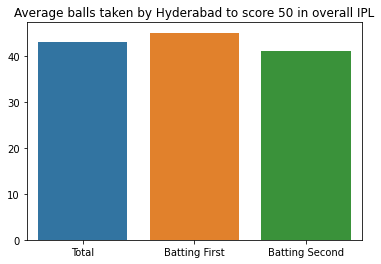

In [55]:
average_balls_overall = pd.Series([avg_balls_taken_overall,avg_balls_taken_overall_batting_first,avg_balls_taken_overall_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_balls_overall.index , y = average_balls_overall)
plt.title('Average balls taken by Hyderabad to score 50 in overall IPL')
plt.show()

Hyderabad took 41-45 balls in an average to score 50 runs in overall IPL.

## How many runs will Chris Gayle score in first 10 balls:

In [56]:
run_list = []
ids1 = delivery[delivery['batsman'] == 'CH Gayle']['match_id'].unique()
for j in ids1:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'CH Gayle')]['batsman_runs'])
    ten_ball_runs = np.sum(runs[0:10])
    run_list.append(ten_ball_runs)
print(run_list)

[17, 10, 15, 4]


These are the runs Chris Gayle scored in first 10 balls against Hyderabad.

In [57]:
avg_runs = np.round(np.mean(run_list))
avg_runs

12.0

Chris Gayle scored 12 runs in an average against Hyderabad in first 10 balls.

In [58]:
run_list_batting_first = []
ids1 = delivery[(delivery['batsman'] == 'CH Gayle') & (delivery['inning'] == 1)]['match_id'].unique()
for j in ids1:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'CH Gayle') & (delivery['inning'] == 1)]['batsman_runs'])
    ten_ball_runs = np.sum(runs[0:10])
    run_list_batting_first.append(ten_ball_runs)
print(run_list_batting_first)

[17]


Chris Gayle played only 1 inning while batting first against Hyderabad and scored 17 runs.

In [59]:
run_list_batting_second = []
ids1 = delivery[(delivery['batsman'] == 'CH Gayle') & (delivery['inning'] == 2)]['match_id'].unique()
for j in ids1:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'CH Gayle') & (delivery['inning'] == 2)]['batsman_runs'])
    ten_ball_runs = np.sum(runs[0:10])
    run_list_batting_second.append(ten_ball_runs)
print(run_list_batting_second)

[10, 15, 4]


These are the runs Chris Gayle scored in first 10 balls against Hyderabad while batting first.

In [60]:
avg_runs_batting_second = np.round(np.mean(run_list_batting_second))
avg_runs_batting_second

10.0

Chris Gayle scored 10 runs in an average against Hyderabad in first 10 balls while batting second.

In [61]:
average_runs = pd.Series([avg_runs,run_list_batting_first[0],avg_runs_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_runs.index , y = average_runs)
plt.title('Average Runs scored by Chris Gayle in first 10 balls against Hyderabad')
plt.show()

Chris Gayle scored more runs while batting first in first 10 balls against Hyderabad.

In [62]:
run_list_overall = []
ids2 = df1[(df1['batsman']== 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab')]['match_id'].unique()
for j in ids2:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    ten_ball_runs = np.sum(runs[0:10])
    run_list_overall.append(ten_ball_runs)
print(run_list_overall)

[10, 17, 13, 10, 6, 8, 2, 14, 6, 18, 0, 9, 11, 18, 6, 15, 15, 6, 13, 24, 24, 4, 13, 6]


These are the runs Chris Gayle scored in first 10 balls playing for Punjab in overall IPL.

In [63]:
avg_runs_overall = np.round(np.mean(run_list_overall))
avg_runs_overall

11.0

Chris Gayle scored 11 runs in an average for Punjab in first 10 balls in overall IPL.

In [64]:
run_list_overall_batting_first = []
ids2 = df1[(df1['batsman']== 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 1)]['match_id'].unique()
for j in ids2:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 1)]['batsman_runs'])
    ten_ball_runs = np.sum(runs[0:10])
    run_list_overall_batting_first.append(ten_ball_runs)
print(run_list_overall_batting_first)

[10, 17, 6, 6, 0, 9, 15, 6, 13, 24, 13]


These are the runs Chris Gayle scored in first 10 balls playing for Punjab in overall IPL while batting first.

In [65]:
avg_runs_overall_batting_first = np.round(np.mean(run_list_overall_batting_first))
avg_runs_overall_batting_first

11.0

Chris Gayle scored 11 runs in an average for Punjab in first 10 balls in overall IPL while batting first.

In [66]:
run_list_overall_batting_second = []
ids2 = df1[(df1['batsman']== 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 2)]['match_id'].unique()
for j in ids2:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 2)]['batsman_runs'])
    ten_ball_runs = np.sum(runs[0:10])
    run_list_overall_batting_second.append(ten_ball_runs)
print(run_list_overall_batting_second)

[13, 10, 8, 2, 14, 18, 11, 18, 6, 15, 24, 4, 6]


These are the runs Chris Gayle scored in first 10 balls playing for Punjab in overall IPL while batting second.

In [67]:
avg_runs_overall_batting_second = np.round(np.mean(run_list_overall_batting_second))
avg_runs_overall_batting_second

11.0

Chris Gayle scored 11 runs in an average for Punjab in first 10 balls in overall IPL while batting second.

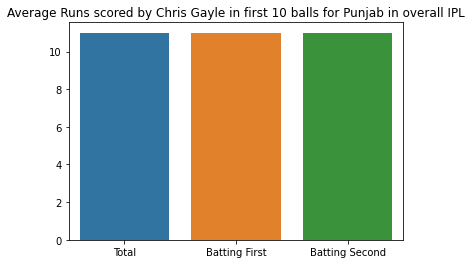

In [68]:
average_runs_overall = pd.Series([avg_runs_overall,avg_runs_overall_batting_first,avg_runs_overall_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_runs_overall.index , y = average_runs_overall)
plt.title('Average Runs scored by Chris Gayle in first 10 balls for Punjab in overall IPL')
plt.show()

Chris Gayle scored 11 runs in an average in first 10 balls for Punjab while batting first or second.